## Credit Scoring Básico

### Importando bilbioteca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lendo os dados

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv"
dados = pd.read_csv(uri)
dados.head()


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
#formato dos dados
dados.shape

(1000, 21)

In [4]:
#verifiando se tem a mesma quant de observações, e se existe valores faltantes 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [5]:
#outra forma de se verificar se tem dados nulos
dados.isnull().sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [6]:
# verificando se tem duplicados
dados.duplicated().sum()

0

### Pilares da cadeia de crédito

- Prospecção(localização precisa)

- Concessão(aceitação)

- Gestão de Risco

- Recuperaçao

### Cadeia de crédito

 #### Poupaores(pessoas que guardam para investir) -> Instituição finaceira ->  Tomadores(pessoas que estão atrás de créditos)
 
 #### Poupaores(pessoas que guardam para investir) <- Instituição finaceira <-  Tomadores(pessoas que estão atrás de créditos)


### Pedido de crédito

##### Tomadores -> Instituição financeira -> Modelo de decisão  - APROVADO OU RECUSADO

#### *Credit Scoring*

- Utilizando um modelo de decisão(regressão logis.), é feito clasficação de um bom ou mal pagador através de análises matemáticas, probabilidades 

##  Verificando os dados com  modelo de regressão Logística

- Existe uma facilidade de replicar o modelo e também nos ajudam a entender de forma bem explicativa como as varáveis se comportam com os resultados
- Exige pouco poder computacional

In [7]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Separando os dados x e y

In [8]:
#Separando os dados x e y
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [9]:
# x vai ser todas as colinas menos default
x = dados.drop(columns = 'default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Agora Treino e Teste utilizando sklearn

In [10]:
#importando bilbioteca
from sklearn.model_selection import train_test_split

In [11]:
#definindo que 30% será teste

SEED = 12 #definindo semente
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)

In [12]:
#verificando a quantidade de obsservaçoes(linhas) em treino
base_treino = treino_x.shape[0]

In [13]:
# agora em teste
base_teste = teste_x.shape[0]

#### O modelo de gressão logistica 

In [14]:
#importando 
from sklearn.linear_model import LogisticRegression

**Para rodar o modelo precisamos manipular os dados e transforma-los em numericos. Pois isso é de característica deste modelo e de outros. Nesse caso, irei realizar o processo manipulação**

In [15]:
#verificando os elementos da conta corrente
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [16]:
#criando um dicionario para deixar os elementos numericos
a ={
    '< 0 DM': 1, '0 <= ... < 200 DM': 2, 'no checking account':3,
       '>= 200 DM / salary assignments for at least 1 year': 4
}

#utilizando map
dados['conta_corrente'] = dados['conta_corrente'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [17]:
dados['historico_credito'].unique()
b = {
           'critical account/ other credits existing (not at this bank)': 1,
           'existing credits paid back duly till now':2,
           'delay in paying off in the past':3,
           'no credits taken/ all credits paid back duly': 4,
           'all credits at this bank paid back duly':5

}
#mapeando
dados['historico_credito'] = dados['historico_credito'].map(b)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [18]:
dados['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [19]:
dados['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [20]:
dados['proposito_emprestimo'].unique()
c = {
       'domestic appliances':1, '(vacation - does not exist?)':2,
       'radio/television':3, 'car (new)':4, 'car (used)':5, 'business':6,
       'repairs':7, 'education':8, 'furniture/equipment':9, 'retraining' :10  
}

In [21]:
#Criando diciionario para todos elementos categoricos
d ={
       'unknown/ no savings account': 1, '... < 100 DM': 2,
       '500 <= ... < 1000 DM ': 3, '.. >= 1000 DM ': 4, '100 <= ... < 500 DM' :5
}
e = {
       '.. >= 7 years':1, '1 <= ... < 4 years':2, '4 <= ... < 7 years':3,
       'unemployed':4, '... < 1 year ':5
}
f ={
       'male : single':1, 'female : divorced/separated/married': 2,
       'male : divorced/separated':3, 'male : married/widowed':4
}
g = {  
       'real estate':1,
       'if not A121 : building society savings agreement/ life insurance':2,
       'unknown / no property':3,
       'if not A121/A122 : car or other, not in attribute 6':4
}
h = {
       'none':1, 'bank':2, 'stores':3
}
    
i = {
       'own':1, 'for free':2, 'rent' :3
}
    
j = {
       'skilled employee / official':1, 'unskilled - resident':2,
       'management/ self-employed/ highly qualified employee/ officer':3,
       'unemployed/ unskilled - non-resident':4
}
    
k = {
   'yes, registered under the customers name ':1, 'none':2
}
    
l = {
    
   'yes':1, 'no' : 0
}

m = {
      'domestic appliances':1, '(vacation - does not exist?)': 2,
       'radio/television': 3, 'car (new)': 4, 'car (used)': 5, 'business': 6,
       'repairs':7, 'education':8, 'furniture/equipment':9, 'retraining':10   

}
n = {
 'none':1, 'guarantor':2, 'co-applicant':3   
}

In [22]:
#aplicando a transformação
dados['reserva_cc'] = dados['reserva_cc'].map(d)
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(e)
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(f)
dados['propriedade'] = dados['propriedade'].map(g)
dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(h)
dados['tipo_residencia'] = dados['tipo_residencia'].map(i)
dados['status_emprego'] = dados['status_emprego'].map(j)
dados['telefone'] = dados['telefone'].map(k)
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(l)
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(m)
dados['outros_fiadores'] =dados['outros_fiadores'].map(n)

In [23]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


### Refazendo a separação dos dados x e y

In [24]:
#verificando se há dados nulos, mas parece q esta ok
dados.isnull().sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [25]:
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [26]:
x = dados.drop(columns = 'default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1
1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1
2,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1
3,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1
4,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1


In [27]:
#defindo dados de teste e treino
SEED = 12
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


### Rodando o modelo regressão logistica apos a transformação dos dados

In [28]:
modelo = LogisticRegression(max_iter=1000) #definindo n de iterações dos dados por default é 100
modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))

0.7528571428571429


Nosso modelo deu 75% de acuracia de treino

In [29]:
#Verificando a acuracia de teste
from sklearn.metrics import accuracy_score 

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)
round(acuracia, 2)*100

74.0

### Matriz de confusão

In [30]:
#importando biblioteca necessária
from sklearn.metrics import plot_confusion_matrix

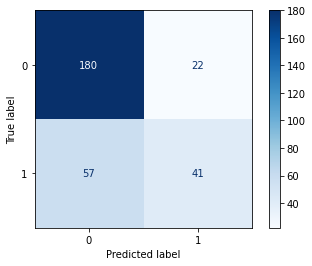

In [31]:
#definindo
matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format = '.3g')
matriz_confusao

Nosso modelo acertou 221 classifcações

#### Classificações - Classification Report

In [32]:
#importando
from sklearn.metrics import classification_report

In [33]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       202
           1       0.65      0.42      0.51        98

    accuracy                           0.74       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300



### Plotando Curva ROC

In [34]:
#Importando
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
#para plotar precisamos instaciar a probabilidade de previsao
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa de falsos positvos
#tvp = taxa de verdadeiros positovs

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)

print('roc_auc', roc_auc_score(teste_y, prob_previsao))

roc_auc 0.7607092341887252


A área sobre a curva roc é 0.76

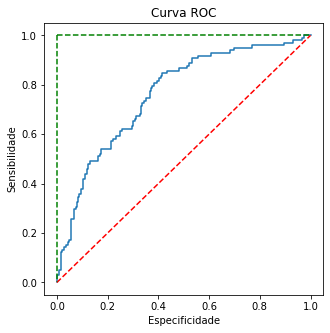

In [36]:
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)

plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')

plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada 

plt.show()

Curva ROC avalia desempenho do modelo a partir da relação entre:

- Verdadeiros Positivos = Sensibilidade
- Falsos Positivos = Especificidade

Para diferentes limites

### AUC

- Quantifica a Curva ROC através da área sob a curva.


#### Convenção Estatistica
- área < 0,7 -> Baixa Discriminação
- 0,7 <= área < 0,8 -> Discriminação aceitável
- 0,8 <= área < 0,9 -> Discriminação excelente
- área > 0,9 -> Discriminação excepcional

No caso do nosso modelo temos uma discriminação aceitavel, esta abaixo de 0,8 e maior q 0,7

## Análise Descritiva

In [37]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [38]:
# homem = categorias 1,3 e 4
# mulher = categorias 2 e 5

dados['sexo_est_civil'].value_counts()

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

Temos 310 mulheres e 910 homens 

In [39]:
dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

Podemos ver que na base negamos mais créditos do que concedemos. Portanto e bem desbalanceada

### Data Visualization


In [40]:
#importando biblioteca
import seaborn as sns

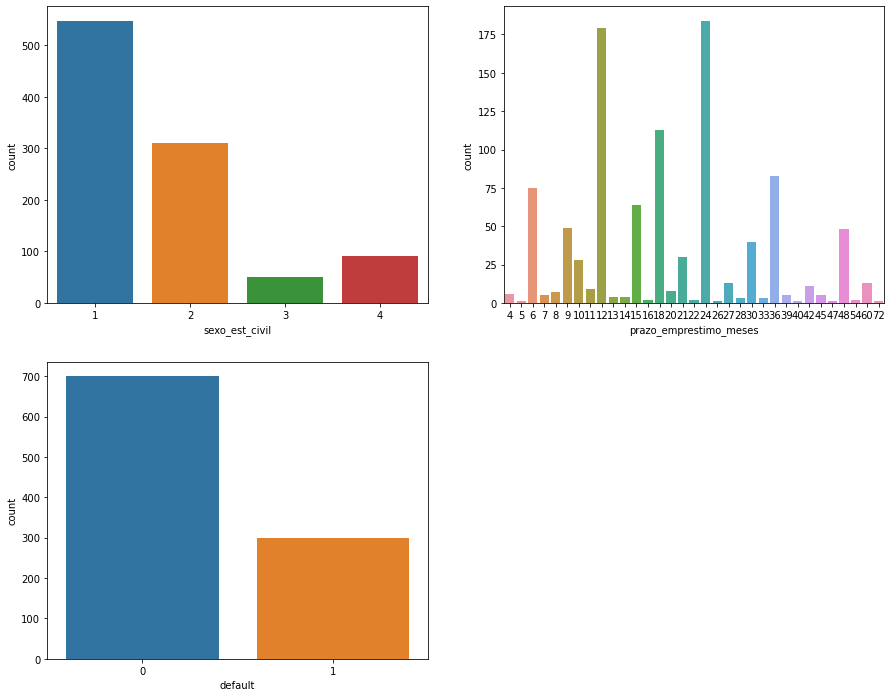

In [41]:
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas)) #enumerando as variaveis 

plt.figure(figsize =(15,12))
for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1) #definindo o formato do plot
    sns.countplot(x = i[1], data= dados)
    

Como ja tratamos o caso de default e sexo_est_civil anterior que número maior de que é solicitado emprestimos é por homens e que a maioria não negadas. O prazo é demorado entre 1 a 2 anos

#### Box-Plot

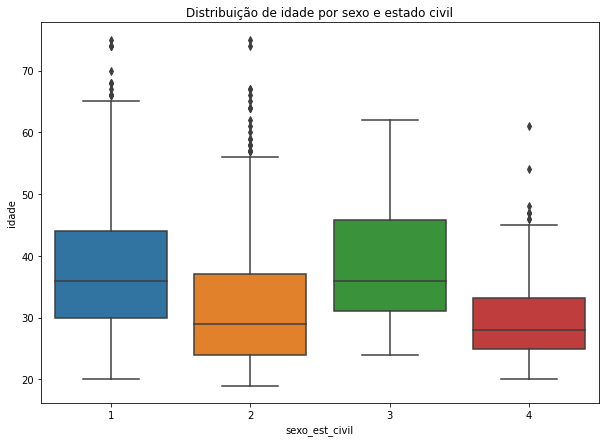

In [42]:
plt.figure(figsize =(10,7))


sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = dados)
plt.title('Distribuição de idade por sexo e estado civil')

plt.show()

#### Gráfico de barras

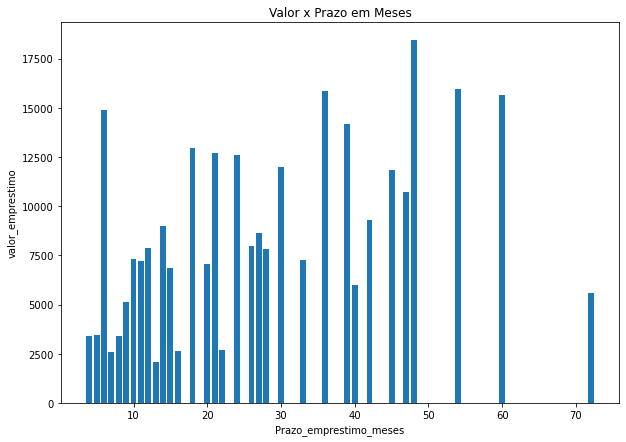

In [43]:

plt.figure(figsize =(10,7))

plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)
plt.xlabel('Prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor x Prazo em Meses')

plt.show()

Podemos observar que o maior valor esta concentrado em 48 meses para retorno

### categorias da variavel 'sexo_est_civil'

- male : divorced/separated = 1
- female : divorced/separated/married = 2
- male : single = 3
- male : married/widowed = 4
- female : single = 5

**criando a variavel 'sexo'**

- 1 = mulher
- 0 = homem

**criando a variavel 'estado_civil**

- 1 = solteira
- 0 = casada/divorciada/viúva

In [45]:
#passando sexo 1 para mulher e 0 para homem
dic_sexo = {2:1, 
            5:1,
            1:0,
            3:0,
            4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo
0,0,1,6,1,1,1169,1,1,4,1,...,1,67,1,1,2,1,1,1,1,0
1,1,2,48,2,1,5951,2,2,2,2,...,1,22,1,1,1,1,1,2,1,1
2,0,3,12,1,2,2096,2,3,2,1,...,1,49,1,1,1,2,2,2,1,0
3,0,1,42,2,3,7882,2,3,2,1,...,2,45,1,2,1,1,2,2,1,0
4,1,1,24,3,4,4870,2,2,3,1,...,3,53,1,2,2,1,2,2,1,0


In [46]:
#estado civil
dic_est_civil = {3:1, 5:1, 2:0,1:0, 4:0 
}
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,0
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,0
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,1,0,0
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,1,0,0


In [70]:
# retirando colunas sensiveis
colunas_tirar = ['sexo_est_civil', 'sexo']
base_dados = dados.drop(columns = colunas_tirar)

### Ajuste do Modelo

In [56]:
#Função roda_modelo: ajuste a validaçaõ

def roda_modelo(base_dados, classificador):
     
#separando a base de modelagem e variavel resposta

    y = base_dados['default']
    x = base_dados.drop(columns = 'default')
    
# separando a base de treino e teste
    SEED = 88
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)
    
    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste  tem %s elementos.' %(base_treino, base_teste))
    print(100*'-')
    
# Ajustando modelo com a base teste
    modelo = classificador
    modelo.fit(treino_x, treino_y)
    
#-------------------------------------------Validação do modelo-----------------------------------------------------------------------#

#Matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format='.3g', cmap='Blues')# 3g = inteiro
    plt.title('Matriz de Confusao')
    plt.show()
    
#classification report 
    
    previsoes = modelo.predict(teste_x)
    
    print(100*'-')
    print('/nClassfication Report: ')
    print(classification_report(teste_y, previsoes))
    
#Curva ROC e AUC
    
    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
    
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('Roc Auc: ', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1,figsize=(7,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada 
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    
    plt.show()
    
    return modelo, matriz_confusao

A base de treino tem 700 elementos e a base de teste  tem 300 elementos.
----------------------------------------------------------------------------------------------------


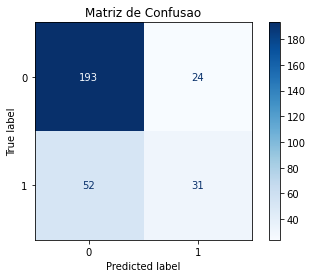

----------------------------------------------------------------------------------------------------
/nClassfication Report: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       217
           1       0.56      0.37      0.45        83

    accuracy                           0.75       300
   macro avg       0.68      0.63      0.64       300
weighted avg       0.73      0.75      0.73       300

----------------------------------------------------------------------------------------------------
Roc Auc:  0.7332741102659486


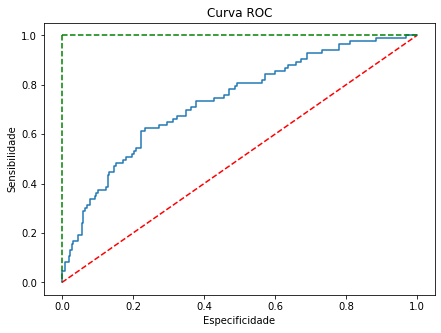

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x18969b24190>)

In [58]:
#chamando a função na base nova sem os dadso sensiveis
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

### Faixas de classificação para solicitantes de créditos
#### Criando 'faixa_idade' para variavel 'idade'

In [59]:
## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

dados['faixa_idade'] = pd.cut(x= dados['idade'], bins = [18,30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,1,0,0,5
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,1,2,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,1,0,0,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,2,1,1,2,2,1,0,0,3
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,1,0,0,4


#### Criando 'faixa_emprestimo' para variavel 'prazo_emprestimo_mes'

In [61]:
## 01 - 12 = 1
## 13 - 24 = 2
## 25 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6

dados['faixa_emprestimo'] = pd.cut(x= dados['prazo_emprestimo_meses'], bins = [1,12, 24, 36, 48, 60, 72], labels=[1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,2,1,1,1,1,0,0,5,1
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,2,1,1,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,2,2,2,1,0,0,3,1
3,0,1,42,2,3,7882,2,3,2,1,...,2,1,1,2,2,1,0,0,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,2,2,1,2,2,1,0,0,4,2


#### Criando 'faixa__valor_emprestimo' para variavel 'Valor_emprestimo'

In [62]:
## 1 - 1000  = 1
## 1001 - 2000 = 2
## 2001 - 3000 = 3
## 3001 - 4000 = 4
## 4001 - 5000 = 5
## 5001 - 6000 = 6
## 6001 - 7000 = 7
## 7001 - 8000 = 8
## 8001 - 9000 = 9
## 9001 - 10000 = 10
## 10001 - 11000 = 11
## 11001 - 12000 = 12
## 12001 - 13000 = 13
## 13001 - 14000 = 14
## 14001 - 15000 = 15
## 15001 - 16000 = 16
## 16001 - 17000 = 17
## 17001 - 18000 = 18
## 18001 - 19000 = 19
## 19001 - 20000 = 20


dados['faixa_valor_emprestimo'] = pd.cut(x= dados['valor_emprestimo'], bins = [1,1000, 2000, 3000, 4000, 5000, 6000,
                                                                              7000,8000, 9000,10000,11000,12000, 13000,
                                                                              14000, 15000, 16000, 17000, 18000, 19000,
                                                                              20000], labels=[1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,1,1,1,1,0,0,5,1,2
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,2,1,1,0,1,4,6
2,0,3,12,1,2,2096,2,3,2,1,...,1,2,2,2,1,0,0,3,1,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,1,2,2,1,0,0,3,4,8
4,1,1,24,3,4,4870,2,2,3,1,...,2,1,2,2,1,0,0,4,2,5


In [75]:
# retirando colunas sensiveis e absolutas
colunas_tirar = ['sexo_est_civil', 'sexo','idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns = colunas_tirar)

A base de treino tem 700 elementos e a base de teste  tem 300 elementos.
----------------------------------------------------------------------------------------------------


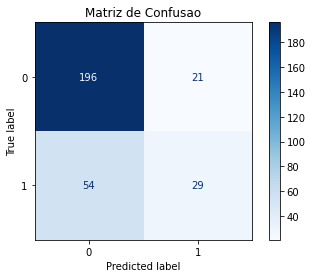

----------------------------------------------------------------------------------------------------
/nClassfication Report: 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       217
           1       0.58      0.35      0.44        83

    accuracy                           0.75       300
   macro avg       0.68      0.63      0.64       300
weighted avg       0.73      0.75      0.73       300

----------------------------------------------------------------------------------------------------
Roc Auc:  0.753706068513686


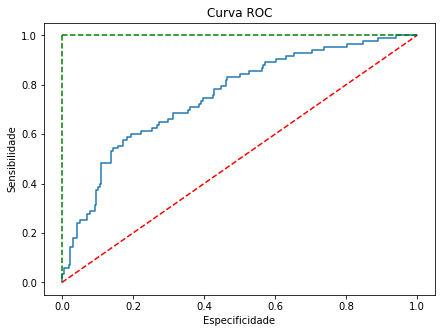

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1896f9b9ee0>)

In [79]:
#Rodando o modelo novamente
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

Ficarei com último pois nosso recall ficou alto e estamos lidando comm modello sem variaveis sensiveis e absolutas que é o certo. 

### Treinando o modelo com a base inteira ja ajustada

In [82]:
modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x = base_dados.drop(columns='default')

modelo.fit(x, y)
print(modelo.score(x, y))

0.749
